In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabets.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [13]:
df.drop(df[df["Insulin"] == 0].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.8 KB


In [15]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 1 %0.25
BloodPressure: 0 %0.00
SkinThickness: 0 %0.00
Insulin: 0 %0.00
BMI: 1 %0.25


In [16]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [18]:
columns_to_fill = ["Glucose", "BMI"]
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [19]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000
mean,3.419048,122.079365,70.653968,29.009524,154.739683,32.876508,0.510625,31.12381
std,3.273463,29.901911,12.672414,10.350386,116.788211,6.915805,0.320782,10.49024
min,0.000000,56.000000,24.000000,7.000000,16.000000,18.200000,0.089000,21.00000
25%,1.000000,99.000000,62.000000,21.000000,82.000000,27.850000,0.274500,23.00000
50%,2.000000,119.000000,70.000000,29.000000,122.000000,33.100000,0.446000,27.00000
75%,5.000000,141.500000,78.000000,36.000000,189.000000,37.300000,0.675500,37.00000
max,17.000000,197.000000,110.000000,60.000000,846.000000,67.100000,2.288000,81.00000


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        50
           1       0.72      0.62      0.67        29

    accuracy                           0.77        79
   macro avg       0.76      0.74      0.75        79
weighted avg       0.77      0.77      0.77        79

0.7721518987341772
[[43  7]
 [11 18]]


In [23]:
#hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [26]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [27]:
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [28]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.75      0.62      0.68        29

    accuracy                           0.78        79
   macro avg       0.78      0.75      0.76        79
weighted avg       0.78      0.78      0.78        79

0.7848101265822784
[[44  6]
 [11 18]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [30]:
def calculate_model_metrics(true, predicted):
    cl_rep = classification_report(true, predicted)
    ac_sc = accuracy_score(true, predicted)
    con_mat = confusion_matrix(true, predicted)
    return cl_rep, ac_sc, con_mat

In [31]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes" : GaussianNB(),
    "K-Neighbors Classifier"  : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

LogisticRegression()
Evaluation for Training Set
classification_report :               precision    recall  f1-score   support

           0       0.83      0.92      0.87       214
           1       0.77      0.59      0.67       101

    accuracy                           0.81       315
   macro avg       0.80      0.75      0.77       315
weighted avg       0.81      0.81      0.81       315

accuracy_score : 0.8126984126984127
confusion_matrix : [[196  18]
 [ 41  60]]
-----------------------------
Evaluation for Test Set
classification_report :               precision    recall  f1-score   support

           0       0.78      0.78      0.78        50
           1       0.62      0.62      0.62        29

    accuracy                           0.72        79
   macro avg       0.70      0.70      0.70        79
weighted avg       0.72      0.72      0.72        79

accuracy_score : 0.7215189873417721
confusion_matrix : [[39 11]
 [11 18]]
-----------------------------


SVC()
Evalu

C:\Users\Bilal\AppData\Local\Temp\ipykernel_8836\4042124518.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=results_df_sorted, palette='viridis')


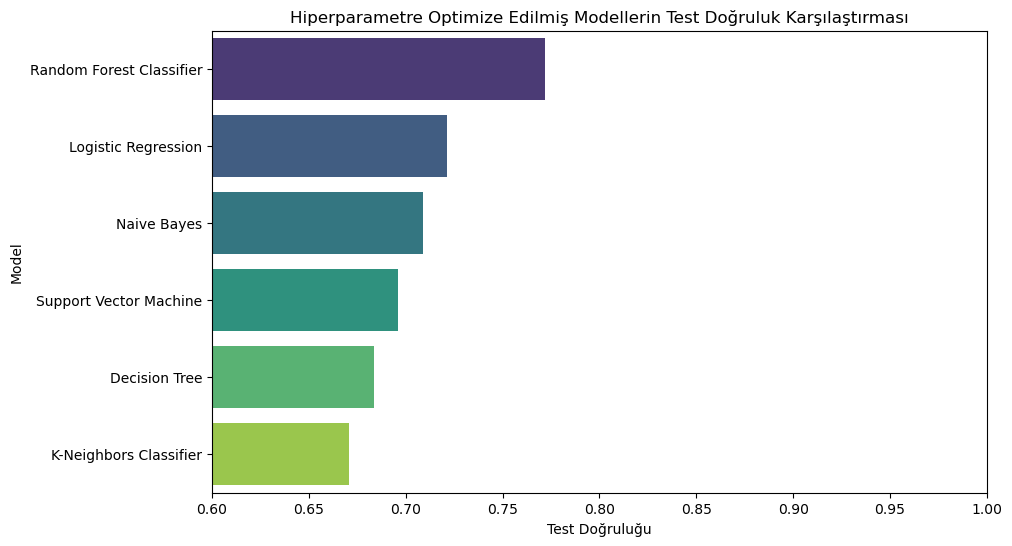

In [37]:
all_results = []

for i in range(len(list(models))):
    model_name = list(models.keys())[i] 
    model = list(models.values())[i]
    
    
    model.fit(X_train, y_train)

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    model_train_clrep, model_train_acsc, model_train_conmat = calculate_model_metrics(y_train, y_train_pred)
    model_test_clrep, model_test_acsc, model_test_conmat = calculate_model_metrics(y_test, y_test_pred)

    
    all_results.append({
        'Model': model_name,
        'Train Accuracy': model_train_acsc,
        'Test Accuracy': model_test_acsc
    })

   
    print(model)
    print("Evaluation for Training Set")
    print("classification_report :", model_train_clrep)
    print("accuracy_score :", model_train_acsc)
    print("confusion_matrix :", model_train_conmat)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("classification_report :", model_test_clrep)
    print("accuracy_score :", model_test_acsc)
    print("confusion_matrix :", model_test_conmat)

    print("-----------------------------")
    print("\n")

results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values(by='Test Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=results_df_sorted, palette='viridis')
plt.title('Hiperparametre Optimize Edilmiş Modellerin Test Doğruluk Karşılaştırması')
plt.xlabel('Test Doğruluğu')
plt.xlim(0.6, 1.0) 
plt.show()